In [53]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import json

In [55]:
path = 'toy3'
single = False
toy = True

In [56]:
with open(path + '/log.txt') as f:
	results = [json.loads(entry) for entry in  f.readlines()]

In [57]:
import matplotlib.pyplot as plt

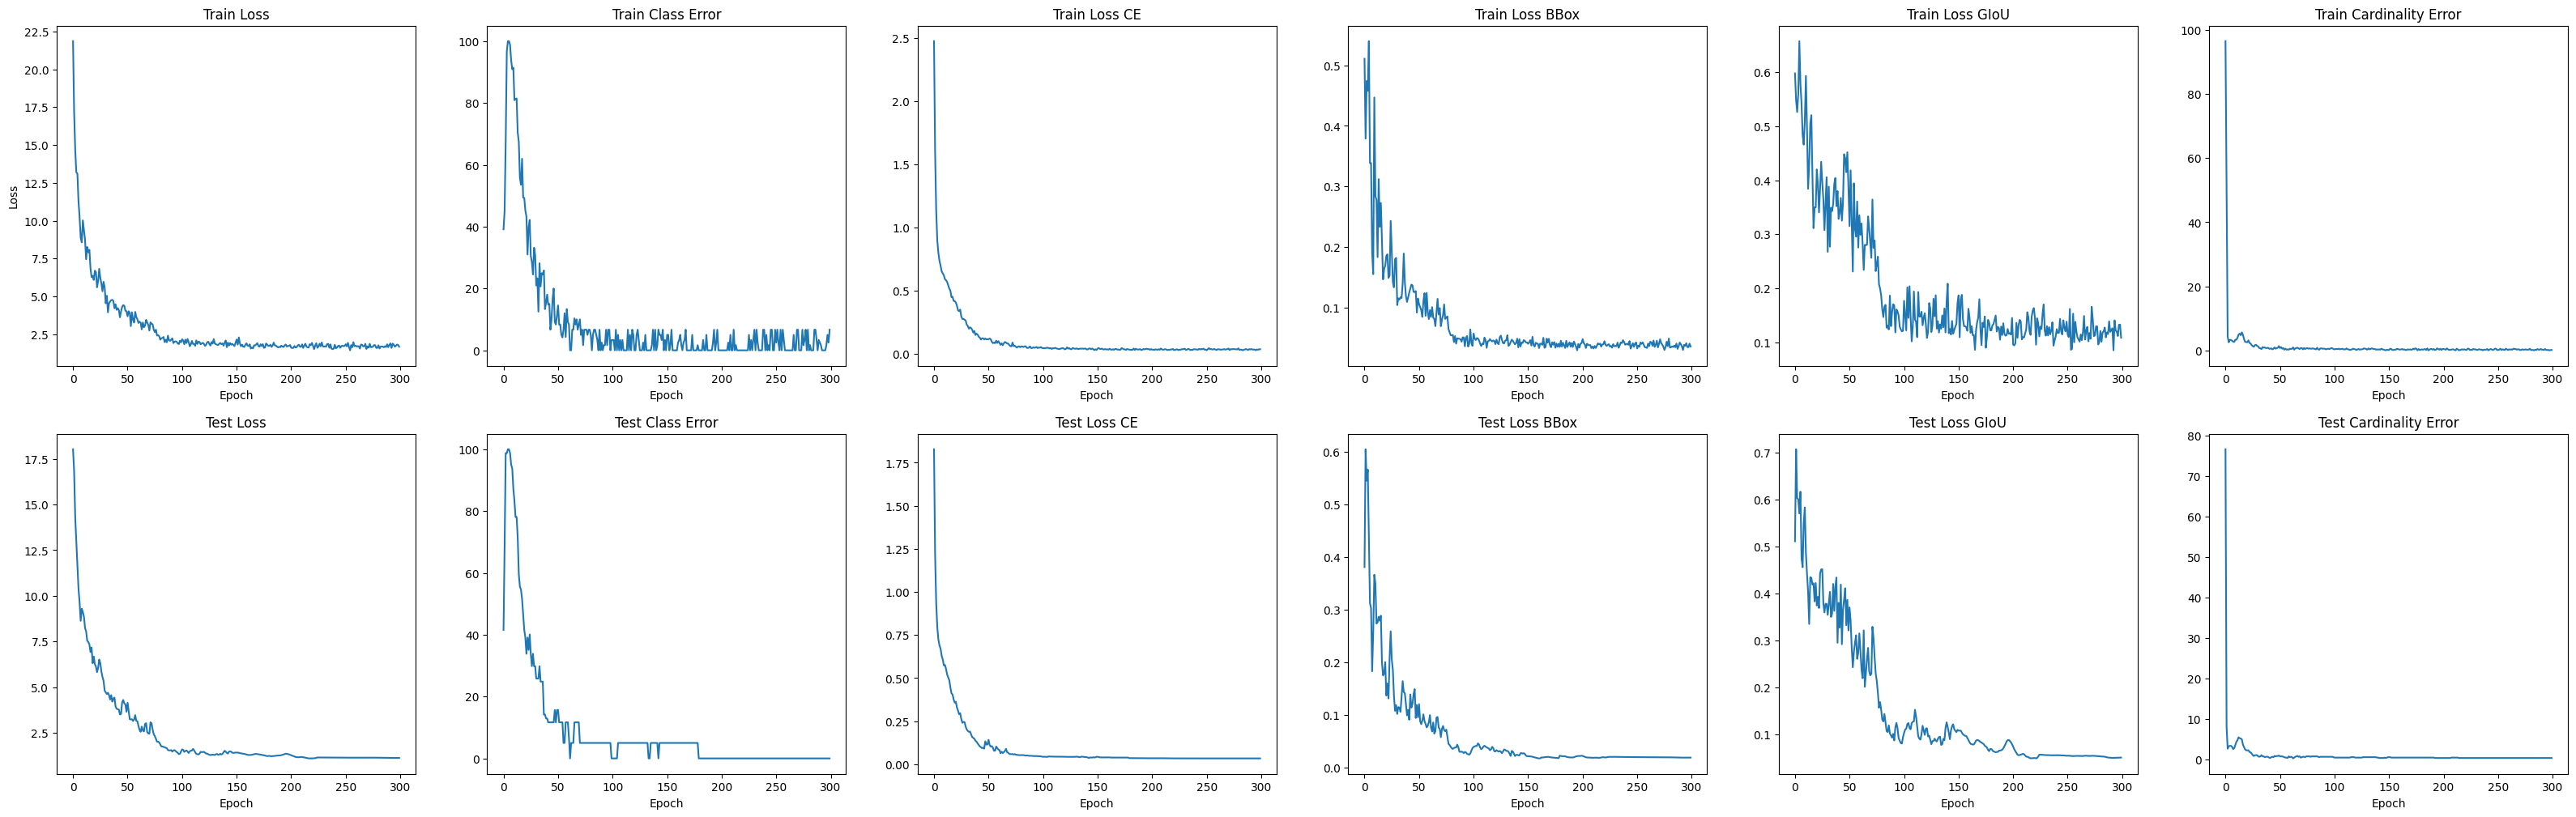

In [58]:
train_losses = [entry['train_loss'] for entry in results]
train_class_errors = [entry['train_class_error'] for entry in results]
train_loss_ce = [entry['train_loss_ce'] for entry in results]
train_loss_bbox = [entry['train_loss_bbox'] for entry in results]
train_loss_giou = [entry['train_loss_giou'] for entry in results]
train_cardinality_error = [entry['train_cardinality_error_unscaled'] for entry in results]

test_loss = [entry['test_loss'] for entry in results]
test_class_errors = [entry['test_class_error'] for entry in results]
test_loss_ce = [entry['test_loss_ce'] for entry in results]
test_loss_bbox = [entry['test_loss_bbox'] for entry in results]
test_loss_giou = [entry['test_loss_giou'] for entry in results]
test_cardinality_error = [entry['test_cardinality_error_unscaled'] for entry in results]

epochs = [entry['epoch'] for entry in results]

fig, axs = plt.subplots(2, 6, figsize=(40, 12))

axs[0][0].set_title('Train Loss')
axs[0][0].set_xlabel('Epoch')
axs[0][0].set_ylabel('Loss')
axs[0][0].plot(epochs, train_losses)

axs[0][1].set_title('Train Class Error')
axs[0][1].set_xlabel('Epoch')
axs[0][1].plot(epochs, train_class_errors)

axs[0][2].set_title('Train Loss CE')
axs[0][2].set_xlabel('Epoch')
axs[0][2].plot(epochs, train_loss_ce)

axs[0][3].set_title('Train Loss BBox')
axs[0][3].set_xlabel('Epoch')
axs[0][3].plot(epochs, train_loss_bbox)

axs[0][4].set_title('Train Loss GIoU')
axs[0][4].set_xlabel('Epoch')
axs[0][4].plot(epochs, train_loss_giou)

axs[0][5].set_title('Train Cardinality Error')
axs[0][5].set_xlabel('Epoch')
axs[0][5].plot(epochs, train_cardinality_error)

axs[1][0].set_title('Test Loss')
axs[1][0].set_xlabel('Epoch')
axs[1][0].plot(epochs, test_loss)

axs[1][1].set_title('Test Class Error')
axs[1][1].set_xlabel('Epoch')
axs[1][1].plot(epochs, test_class_errors)

axs[1][2].set_title('Test Loss CE')
axs[1][2].set_xlabel('Epoch')
axs[1][2].plot(epochs, test_loss_ce)

axs[1][3].set_title('Test Loss BBox')
axs[1][3].set_xlabel('Epoch')
axs[1][3].plot(epochs, test_loss_bbox)

axs[1][4].set_title('Test Loss GIoU')
axs[1][4].set_xlabel('Epoch')
axs[1][4].plot(epochs, test_loss_giou)

axs[1][5].set_title('Test Cardinality Error')
axs[1][5].set_xlabel('Epoch')
axs[1][5].plot(epochs, test_cardinality_error)

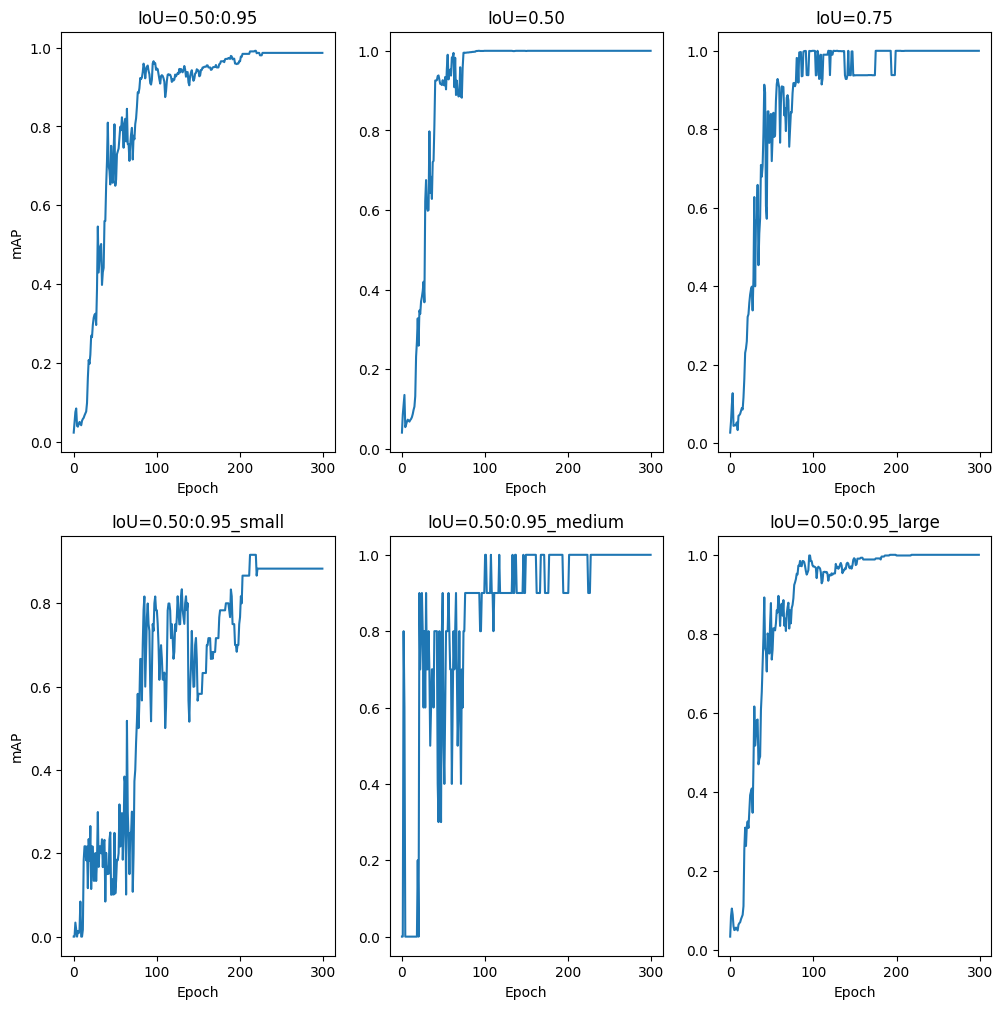

In [59]:
AP = [entry['test_coco_eval_bbox'] for entry in results]
AP = [[values[i] for values in AP] for i in range(6)]

fig, axs = plt.subplots(2, 3, figsize=(12, 12))
axs[0, 0].set_ylabel('mAP')
axs[1, 0].set_ylabel('mAP')

metrics = ['IoU=0.50:0.95', 'IoU=0.50', 'IoU=0.75', 'IoU=0.50:0.95_small', 'IoU=0.50:0.95_medium', 'IoU=0.50:0.95_large']

for i, data in enumerate(AP):
	metric = metrics[i]
	axs[i // 3, i % 3].set_title(metric)
	axs[i // 3, i % 3].set_xlabel('Epoch')
	axs[i // 3, i % 3].plot(epochs, data, label=metric)

In [60]:
from models import build_model

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self

args = AttrDict(
    batch_size=2,
    backbone='resnet50',
    dilation=False,
    position_embedding='sine',
    enc_layers=6,
    dec_layers=6,
    dim_feedforward=2048,
    hidden_dim=256,
    dropout=0.1,
    nheads=8,
    num_queries=100,
    pre_norm=False,
    masks=False,
    aux_loss=True,
    
	set_cost_class=1,
	set_cost_bbox=5,
	set_cost_giou=2,
    
    mask_loss_coef=1,
    bbox_loss_coef=5,
    giou_loss_coef=2,
    eos_coef=0.1,
    
	dataset_file='taco_single' if single else 'taco',
    device='cuda',
    lr_backbone=1e-5,
    toy=toy,
    
    coco_path='/datasets/TACO-master/data',
)
model, criterion, postprocessors = build_model(args)
model.to(args.device)


/home/tur.nadav/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tur.nadav/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DETR(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (decoder): TransformerDecoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerDecoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, ou

In [61]:
from datasets import build_dataset

dataset_test = build_dataset(image_set='test', args=args)

dataset_test_no_transform = build_dataset(image_set='test', args=args, transform=False)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [62]:
import torch

device = torch.device(args.device)

checkpoint = torch.load(path + '/best_checkpoint.pth', map_location='cpu')

model.load_state_dict(checkpoint['model'])

<All keys matched successfully>

In [63]:
from torch.utils.data import DataLoader
import util.misc as utils
from engine import evaluate
from datasets import get_coco_api_from_dataset

sampler_test = torch.utils.data.SequentialSampler(dataset_test)
data_loader_test = DataLoader(dataset_test, args.batch_size, sampler=sampler_test,
                                 drop_last=False, collate_fn=utils.collate_fn, num_workers=2)

base_ds = get_coco_api_from_dataset(dataset_test)
test_stats, coco_evaluator = evaluate(model, criterion, postprocessors,
                                              data_loader_test, base_ds, device, '')

Test:  [0/5]  eta: 0:00:05  class_error: 0.00  loss: 1.4540 (1.4540)  loss_ce: 0.0584 (0.0584)  loss_bbox: 0.0351 (0.0351)  loss_giou: 0.0457 (0.0457)  loss_ce_0: 0.1657 (0.1657)  loss_bbox_0: 0.0759 (0.0759)  loss_giou_0: 0.1959 (0.1959)  loss_ce_1: 0.1395 (0.1395)  loss_bbox_1: 0.0459 (0.0459)  loss_giou_1: 0.1195 (0.1195)  loss_ce_2: 0.0937 (0.0937)  loss_bbox_2: 0.0483 (0.0483)  loss_giou_2: 0.1161 (0.1161)  loss_ce_3: 0.0823 (0.0823)  loss_bbox_3: 0.0341 (0.0341)  loss_giou_3: 0.0494 (0.0494)  loss_ce_4: 0.0870 (0.0870)  loss_bbox_4: 0.0272 (0.0272)  loss_giou_4: 0.0341 (0.0341)  loss_ce_unscaled: 0.0584 (0.0584)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.0070 (0.0070)  loss_giou_unscaled: 0.0228 (0.0228)  cardinality_error_unscaled: 0.5000 (0.5000)  loss_ce_0_unscaled: 0.1657 (0.1657)  loss_bbox_0_unscaled: 0.0152 (0.0152)  loss_giou_0_unscaled: 0.0980 (0.0980)  cardinality_error_0_unscaled: 1.0000 (1.0000)  loss_ce_1_unscaled: 0.1395 (0.1395)  loss_bbox_1_unsc

In [64]:
from torchmetrics.detection.mean_ap import MeanAveragePrecision
import tqdm

m_ap = MeanAveragePrecision(class_metrics=True, box_format='xyxy')

with torch.no_grad():
    for samples, targets in tqdm.tqdm(data_loader_test):
        samples = samples.to(device)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        outputs = model(samples)

        orig_target_sizes = torch.stack([t["orig_size"] for t in targets], dim=0)
        results = postprocessors['bbox'](outputs, orig_target_sizes)
        for target in targets:
            for box in target['boxes']:
                # get cx, cy, w, h
                box[0] = box[0] * target['orig_size'][1]
                box[1] = box[1] * target['orig_size'][0]
                box[2] = box[2] * target['orig_size'][1]
                box[3] = box[3] * target['orig_size'][0]
                # convert to xyxy
                box[0] -= box[2] / 2
                box[1] -= box[3] / 2
                box[2] += box[0]
                box[3] += box[1]
        targets = [{k: v.detach().cpu() for k, v in t.items() if k in ['boxes', 'labels', 'iscrowd']} for t in targets]
        results = [{k: v.detach().cpu() for k, v in t.items()} for t in results]
        m_ap.update(results, targets)
results = m_ap.compute()

100%|██████████| 5/5 [00:01<00:00,  2.98it/s]


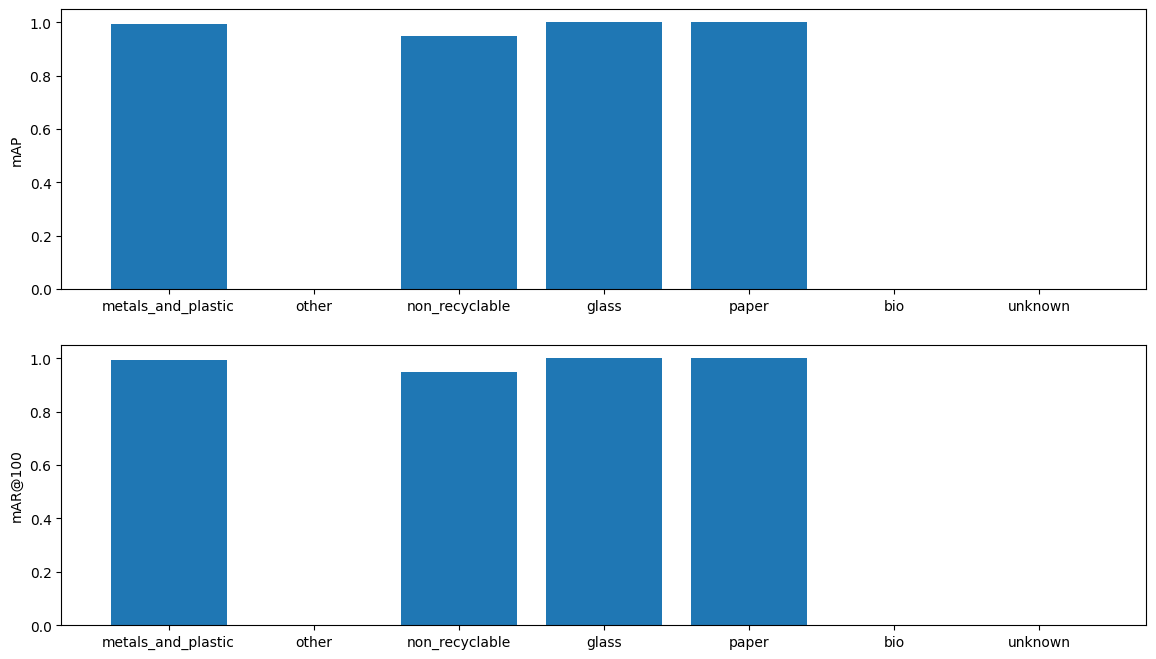

In [65]:
if single:
	category_names = ['litter']
	map_per_class = results['map_per_class'].tolist()
	mar_100_per_class = results['mar_100_per_class'].tolist()
else:
	category_names = [dataset_test.coco.cats[i]['name'] for i in dataset_test.catIds]
	missing_categories = [category - 1 for category in dataset_test.catIds if category not in results['classes']]
	map_per_class = results['map_per_class'].tolist()
	mar_100_per_class = results['mar_100_per_class'].tolist()
	for category in missing_categories:
		map_per_class.insert(category, 0)
		mar_100_per_class.insert(category, 0)

map_per_class = [max(0, map) for map in map_per_class]
mar_100_per_class = [max(0, mar) for mar in mar_100_per_class]

fig, axs = plt.subplots(2, 1, figsize=(14, 8))

axs[0].bar(category_names, map_per_class)
# axs[0].set_xlabel('Category')
axs[0].set_ylabel('mAP')
axs[1].bar(category_names, mar_100_per_class)
# axs[1].set_xlabel('Category')
axs[1].set_ylabel('mAR@100')

plt.show()

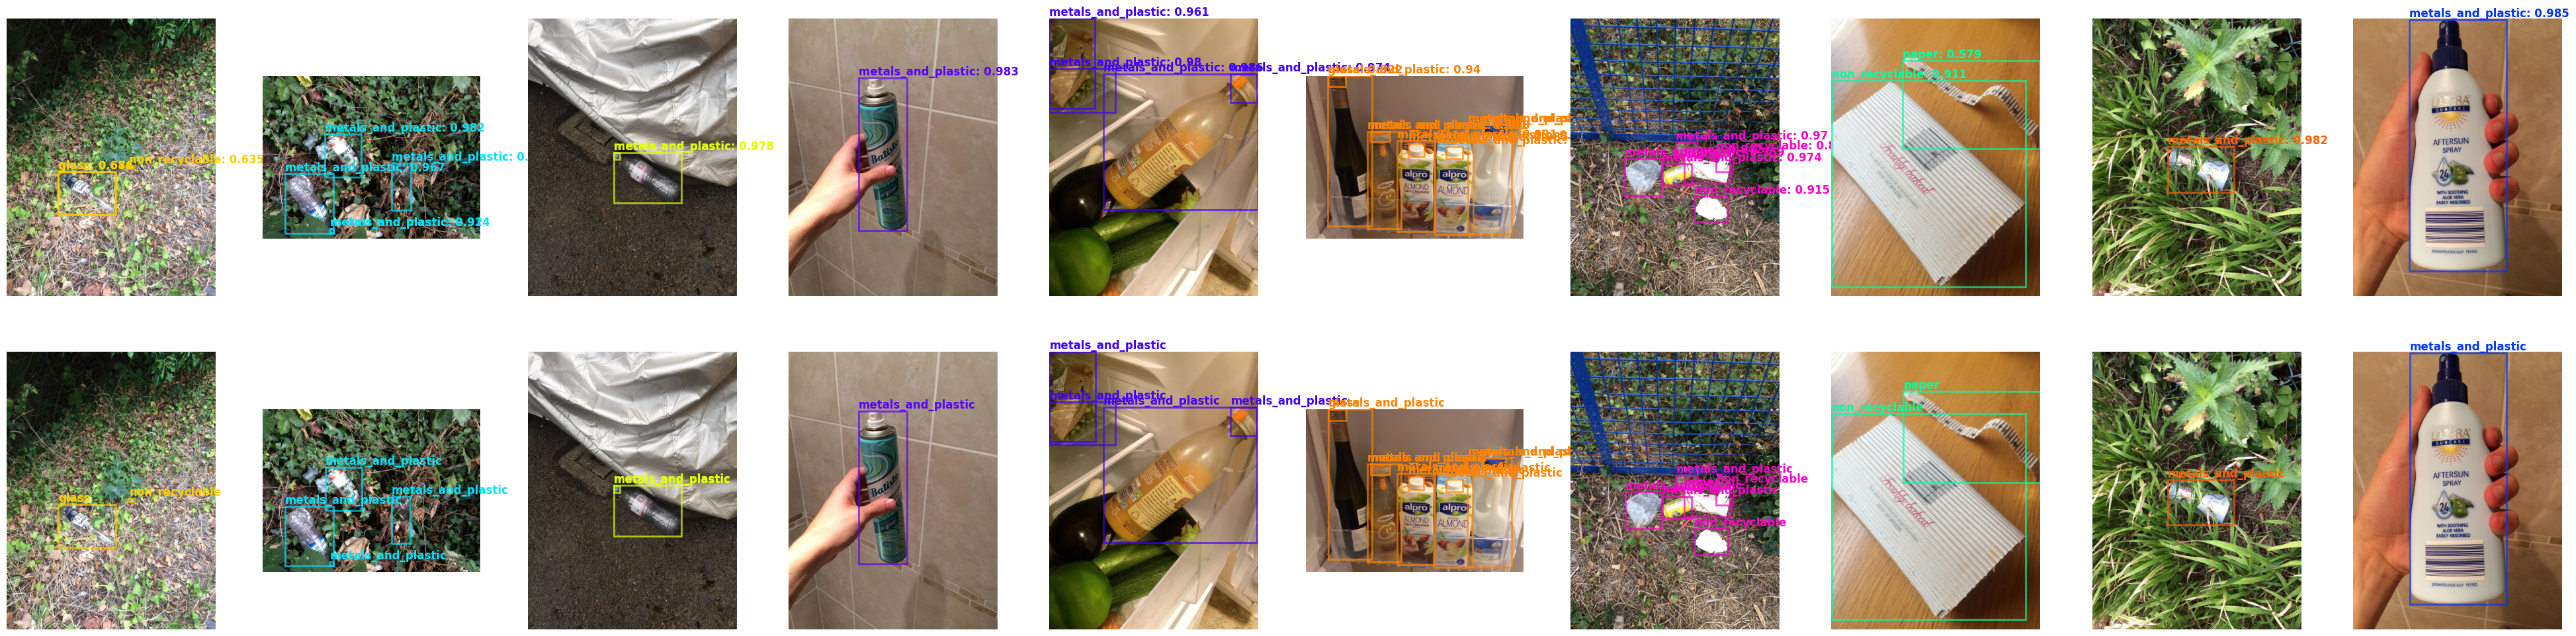

In [66]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Rectangle
from matplotlib.collections import PatchCollection
import colorsys
import random
from PIL import Image
import numpy as np

indexes = random.sample(range(len(dataset_test)), 10)

fig, axs = plt.subplots(2, 10, figsize=(50, 12))

for axs_index, i in enumerate(indexes):
    # pick one image from the test set
    img, real_ann = dataset_test[i]
    real_ann = {k: v.to(device) for k, v in real_ann.items()}
    # put the model in evaluation mode
    model.eval()
    with torch.no_grad():
        outputs = model([img.to(device)])
        orig_target_sizes = torch.stack([real_ann["orig_size"]], dim=0)
        prediction = postprocessors['bbox'](outputs, orig_target_sizes)

    # Load image
    I = dataset_test_no_transform[i][0]

    # Show image
    axs[0][axs_index].axis('off')
    axs[0][axs_index].imshow(I)
    axs[1][axs_index].axis('off')
    axs[1][axs_index].imshow(I)

    # Load mask ids
    anns_sel = prediction
    
    # Show annotations
    for ann in anns_sel:
        color = colorsys.hsv_to_rgb(np.random.random(),1,1)
        for box, score, label in zip(ann['boxes'], ann['scores'], ann['labels']):
            if score > 0.5:
                [x1, y1, x2, y2] = box.cpu()
                x = x1
                y = y1
                w = x2 - x1
                h = y2 - y1
                rect = Rectangle((x,y),w,h,linewidth=2,edgecolor=color,
                                    facecolor='none', alpha=0.7)
                axs[0][axs_index].add_patch(rect)
                if single:
                    category_name = 'litter'
                else:
                    coco_cat_id = dataset_test.catIds[label.item() - 1]
                    category_name = dataset_test.coco.cats[coco_cat_id]['name']
                axs[0][axs_index].annotate(f"{category_name}: {score:.3}", (x,y), color=color, weight='bold',
                        fontsize=12, ha='left', va='bottom')

    # show real annotations
    for box, label in zip(real_ann['boxes'], real_ann['labels']):
        orig_size = real_ann['orig_size'].cpu()
        [x1, y1, x2, y2] = box.cpu()
        x = x1 * orig_size[1]
        y = y1 * orig_size[0]
        w = x2 * orig_size[1]
        h = y2 * orig_size[0]
        # get x, y, w, h
        x -= w / 2
        y -= h / 2
        rect = Rectangle((x,y),w,h,linewidth=2,edgecolor=color,
                            facecolor='none', alpha=0.7)
        axs[1][axs_index].add_patch(rect)
        coco_cat_id = dataset_test.catIds[label.item() - 1]
        category_name = dataset_test.coco.cats[coco_cat_id]['name']
        axs[1][axs_index].annotate(category_name, (x,y), color=color, weight='bold',
                fontsize=12, ha='left', va='bottom')


plt.show()